# Детекция сигарет на изображении (1 уровень)


In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 627.5/627.5 kB 34.6 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### В качестве модели выберем YOLOv8


In [3]:
from ultralytics import YOLO

# Load a trained model
model = YOLO('/content/drive/MyDrive/best.pt')

# Untrained in case we need it
# model = YOLO('/content/drive/MyDrive/yolov8n.pt')

### Загружаем датасет

In [4]:
# Load data
data = '/content/drive/MyDrive/cigarette_detection/data.yaml'

### EDA

Посмотрим на какое-нибудь изображение.

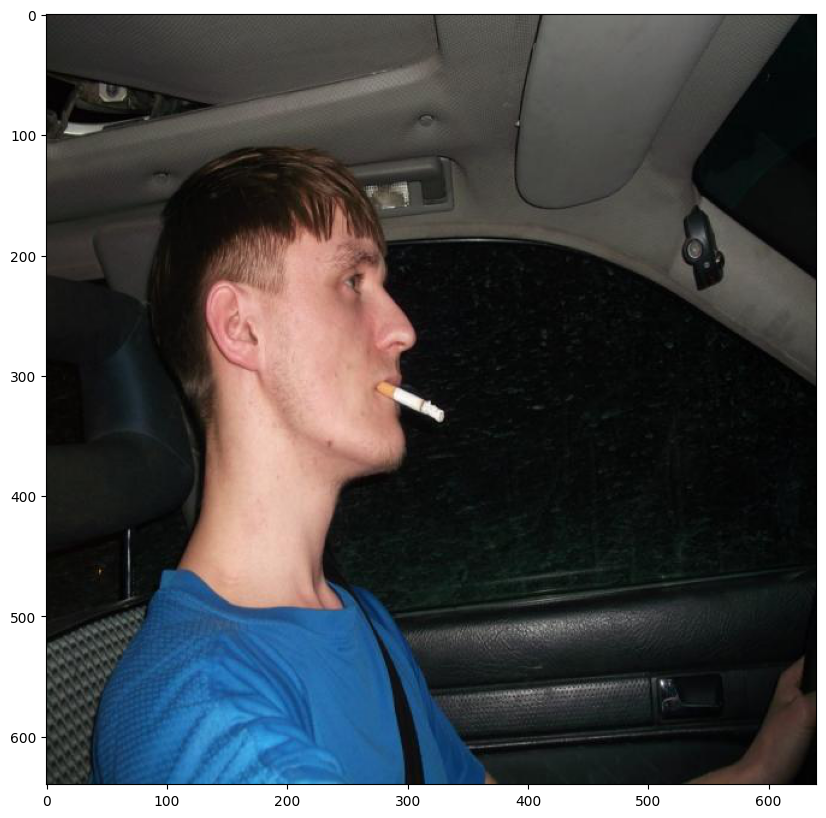

In [31]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 10))

plt.plot(131)
img = plt.imread('/content/drive/MyDrive/cigarette_detection/test/images/00105_jpg.rf.14290ca3d8bb6e65010ab16e96d6fa5d.jpg')

plt.imshow(img)

Для успешного обучения YOLO размер изображения должен быть любым кратным 32. Поэтому все размеченые изображения были приведены к размеру 640x640.

### Обучаем

In [ ]:
# Train the model
model.train(data=data, epochs=100, imgsz=640)

In [ ]:
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered

Ultralytics YOLOv8.0.132 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/cigarette_detection/valid/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]
                   all         30         30       0.67      0.611      0.637      0.218
Speed: 8.8ms preprocess, 25.1ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/val


### Сохраняем предсказания

In [5]:
import numpy as np
import torchvision.transforms as T
from matplotlib import pyplot as plt
import cv2
from PIL import Image

In [29]:
source = '/content/drive/MyDrive/cigarette_detection/test/images/00105_jpg.rf.14290ca3d8bb6e65010ab16e96d6fa5d.jpg'

res = model(source)
res_plotted = res[0].plot()


image 1/1 /content/drive/MyDrive/cigarette_detection/test/images/00105_jpg.rf.14290ca3d8bb6e65010ab16e96d6fa5d.jpg: 640x640 1 Cigarette, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


In [30]:
imageRGB = cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB)
img = Image.fromarray(imageRGB)
img.save('test_image.jpg')

### Выведем обработанное изображение с нарисованными боксами

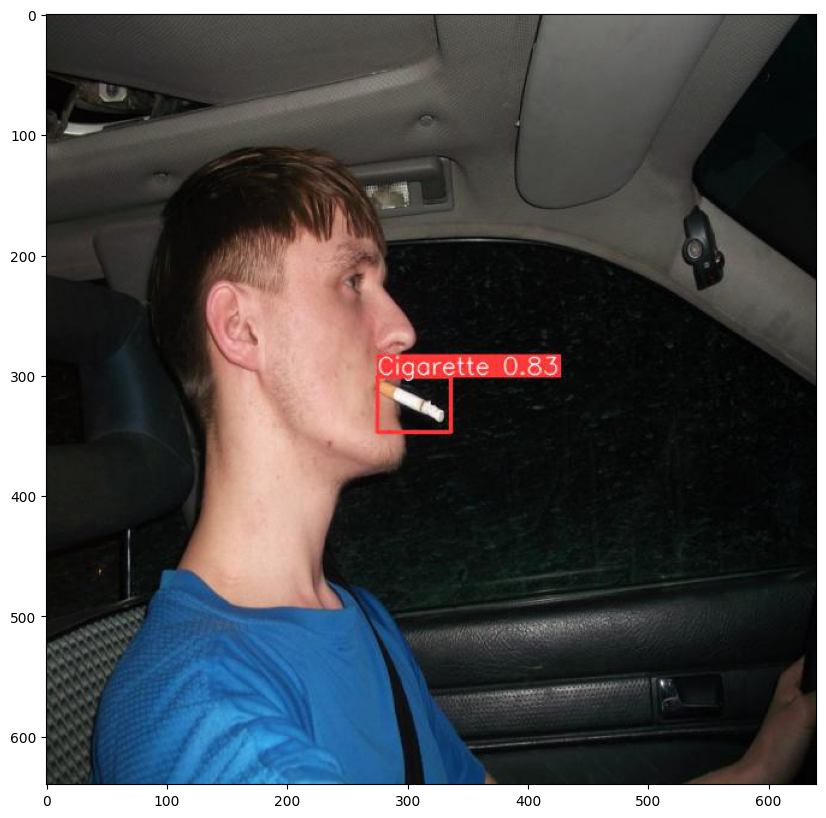

In [32]:
plt.figure(figsize=(10, 10))

plt.plot(131)
img = plt.imread('/content/test_image.jpg')

plt.imshow(img)